<a href="https://colab.research.google.com/github/gorleramyasri/Thesis/blob/main/Thesis_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, Activation, Dropout

#from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries

In [ ]:
path="/content/drive/MyDrive/MTECH2YPROJECT/MTech2y/DataAnalysis/Datastes/sample(r).csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.columns = df.iloc[0]

In [ ]:
df = df.iloc[1:]

In [ ]:
df.set_index(df.iloc[:, 0], inplace=True)


In [ ]:
df = df.drop(df.columns[0], axis=1)

In [ ]:
df = df.rename_axis('timestamp')

In [ ]:
df.head()


,Utilization (%),Eff Freq,IPC (Sys + User),CPI (Sys + User),Branch Misprediction Ratio,IC (32B) Fetch Miss Ratio,Op Cache (64B) Fetch Miss Ratio,IC Access (pti),IC Miss (pti),DC Access (pti),...,L2 Miss from HWPF (pti),L2 Hit (pti),L2 Hit from IC Miss (pti),L2 Hit from DC Miss (pti),L2 Hit from HWPF (pti),L3 Access,L3 Miss,L3 Miss %,Ave L3 Miss Latency,NaN
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-30 11:23:04.937216,18.79,1901.27,0.92,1.09,0.02,0.39,0.45,153.88,60.23,443.37,...,4.66,61.83,41.63,15.33,4.87,627209.00,57953.00,9.24,446.89,NaN
2023-10-30 11:23:04.937226,29.71,1976.42,0.97,1.03,0.02,0.41,0.48,163.75,67.52,474.98,...,7.16,52.76,38.37,9.02,5.37,525262.00,71201.00,13.56,602.03,NaN
2023-10-30 11:23:04.937235,17.17,1804.29,0.99,1.01,0.02,0.39,0.48,178.58,70.40,479.66,...,8.63,18.49,9.07,6.08,3.34,481940.00,66661.00,13.83,476.75,NaN
2023-10-30 11:23:04.937243,4.18,1625.43,0.86,1.17,0.01,0.13,0.15,37.92,4.75,539.19,...,2.51,18.64,10.10,7.91,0.63,47191.00,5707.00,12.09,415.62,NaN
2023-10-30 11:23:04.937252,24.45,1778.19,0.99,1.01,0.02,0.39,0.45,166.42,65.27,456.18,...,3.41,26.31,21.66,3.19,1.47,504480.00,47421.00,9.40,936.12,NaN


In [ ]:
df.columns


Index([                               'Utilization (%)',
                                             'Eff Freq',
                                     'IPC (Sys + User)',
                                     'CPI (Sys + User)',
                           'Branch Misprediction Ratio',
                            'IC (32B) Fetch Miss Ratio',
                      'Op Cache (64B) Fetch Miss Ratio',
                                      'IC Access (pti)',
                                        'IC Miss (pti)',
                                      'DC Access (pti)',
                         'DC Fills From Same CCX (pti)',
       'DC Fills From different CCX in same node (pti)',
                     'DC Fills From Local Memory (pti)',
                 'DC Fills From Remote CCX Cache (pti)',
                    'DC Fills From Remote Memory (pti)',
                                   'All DC Fills (pti)',
                                      'L2 Access (pti)',
                         'L2 Ac

In [ ]:
all_y = df['IPC (Sys + User)'].values

In [ ]:
df=df.drop('CPI (Sys + User)',axis=1)

In [ ]:
df.head()

,Utilization (%),Eff Freq,IPC (Sys + User),Branch Misprediction Ratio,IC (32B) Fetch Miss Ratio,Op Cache (64B) Fetch Miss Ratio,IC Access (pti),IC Miss (pti),DC Access (pti),DC Fills From Same CCX (pti),...,L2 Miss from HWPF (pti),L2 Hit (pti),L2 Hit from IC Miss (pti),L2 Hit from DC Miss (pti),L2 Hit from HWPF (pti),L3 Access,L3 Miss,L3 Miss %,Ave L3 Miss Latency,NaN
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-30 11:23:04.937216,18.79,1901.27,0.92,0.02,0.39,0.45,153.88,60.23,443.37,23.18,...,4.66,61.83,41.63,15.33,4.87,627209.00,57953.00,9.24,446.89,NaN
2023-10-30 11:23:04.937226,29.71,1976.42,0.97,0.02,0.41,0.48,163.75,67.52,474.98,36.30,...,7.16,52.76,38.37,9.02,5.37,525262.00,71201.00,13.56,602.03,NaN
2023-10-30 11:23:04.937235,17.17,1804.29,0.99,0.02,0.39,0.48,178.58,70.40,479.66,26.33,...,8.63,18.49,9.07,6.08,3.34,481940.00,66661.00,13.83,476.75,NaN
2023-10-30 11:23:04.937243,4.18,1625.43,0.86,0.01,0.13,0.15,37.92,4.75,539.19,22.91,...,2.51,18.64,10.10,7.91,0.63,47191.00,5707.00,12.09,415.62,NaN
2023-10-30 11:23:04.937252,24.45,1778.19,0.99,0.02,0.39,0.45,166.42,65.27,456.18,22.15,...,3.41,26.31,21.66,3.19,1.47,504480.00,47421.00,9.40,936.12,NaN


In [ ]:
dataset=all_y.reshape(-1, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
dataset = scaler.fit_transform(dataset)

In [ ]:
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 240
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=240, verbose=1)

Epoch 1/1000
20/20 [==============================] - 3s 8ms/step - loss: 0.0116
Epoch 2/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.0083
Epoch 3/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.0077
Epoch 4/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.0075
Epoch 5/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.0072
Epoch 6/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.0070
Epoch 7/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.0068
Epoch 8/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.0066
Epoch 9/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.0065
Epoch 10/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.0062
Epoch 11/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 12/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.0061
Epoch 13/1000
20/20 [====

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

147/147 [==============================] - 0s 2ms/step


In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.08 RMSE
Test Score: 0.35 RMSE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions

testPrices:


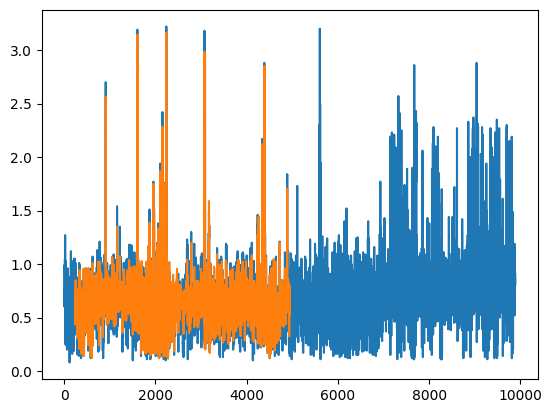

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])

In [ ]:

print('testPredictions:')
print(testPredict)

testPredictions:
[[0.7568066 ]
 [0.8399347 ]
 [0.73818636]
 ...
 [0.9213597 ]
 [0.95007557]
 [0.6972292 ]]


In [ ]:
df = pd.DataFrame(data={"prediction": np.around(list(testPredict.reshape(-1)), decimals=2), "test_price": np.around(list(testPrices.reshape(-1)), decimals=2)})
df.to_csv("lstm_result.csv", sep=';', index=None)

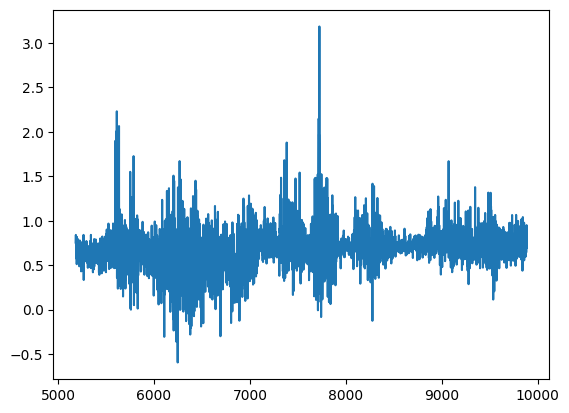

In [ ]:
# plot the actual price, prediction in test data=red line, actual price=blue line
plt.plot(testPredictPlot)
plt.show()